In [14]:
from datamode.interface import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from datetime import datetime as dt
import os
# print(os.listdir("../input"))
import seaborn as sns 
from scipy import stats


In [2]:
# new_merchant_transactions = pd.read_csv('all/new_merchant_transactions.csv',parse_dates=['purchase_date'], nrows=1000)
# historical_transactions = pd.read_csv('all/historical_transactions.csv',parse_dates=['purchase_date'], nrows=1000)
n_txs = pd.read_csv('all/new_merchant_transactions.csv',parse_dates=['purchase_date'])
# h_txs = pd.read_csv('all/historical_transactions.csv',parse_dates=['purchase_date'])
merchant = pd.read_csv('all/merchants.csv').drop(['category_1', 'category_2'], 1)# Since category column exist in transaction data already, we filter them out before merge into transaction data 


In [3]:
def identify_outliers(df, col, z_threshold=3):
    """
    Identifty outliers cohort by z score
    """
    z = np.abs(stats.zscore(df[col]))
    df = df[z>z_threshold]
    print("Outliers stats")
    print(df[col].describe())
    return df

In [20]:
def filter_outliers(df, col, z_threshold = 3):
    """
    Return df without outliers 
    """
    z = np.abs(stats.zscore(df[col]))
    df = df[z<z_threshold]
    print("Stats")
    print(df[col].describe())
    return df

In [4]:
purchase_outliers = identify_outliers(n_txs, ["purchase_amount"])

Outliers stats
       purchase_amount
count     18337.000000
mean          4.018515
std           4.878641
min           1.531111
25%           1.970682
50%           2.707687
75%           4.215297
max         263.157498


In [5]:
print(purchase_outliers.shape)
print(n_txs.shape)

(18337, 14)
(1963031, 14)


In [6]:
purchase_outliers.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [7]:
purchase_cat_cols = ["purchase_amount", "category_1", "category_2", "category_3","merchant_id", "purchase_date"]

In [8]:
quickshow(purchase_outliers[purchase_cat_cols])


[WARNING] A YAML file was not found. If this is expected please ignore this warning.
[DEBUG] [__init__:15    ] Execute transforms (Start): current time=4:54:28.306
[INFO] Transforms:
["SourceDF, options={'df':          purchase_amount category_1  category_2 "
 'category_3      merchant_id  \\\n'
 '6               5.263697          N         1.0          B  '
 'M_ID_6d061b5ddc   \n'
 '10              4.452265          N         1.0        NaN  '
 'M_ID_3ffd43b4cd   \n'
 '21              3.009720          Y         NaN          C  '
 'M_ID_79692349d6   \n'
 '24              2.126146          Y         NaN          C  '
 'M_ID_3111c6df35   \n'
 '51              1.597228          N         4.0          A              '
 'NaN   \n'
 '64              2.859455          N         4.0          A  '
 'M_ID_0c9c0f995f   \n'
 '156             2.198289          N         3.0          A  '
 'M_ID_17eb896bf2   \n'
 '161             1.582202          N         3.0          A  '
 'M_ID_8949e3f6e1   \n'

[DEBUG] [__init__:15    ] ReactBridge (Start): current time=4:54:28.473


/Users/peggy/.virtualenvs/dm/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [36]:
quickshow(n_txs[purchase_cat_cols])

[WARNING] A YAML file was not found. If this is expected please ignore this warning.
[DEBUG] [__init__:15    ] Execute transforms (Start): current time=5:07:01.976
[INFO] Transforms:
["SourceDF, options={'df':          purchase_amount category_1  category_2 "
 'category_3      merchant_id  \\\n'
 '0              -0.557574          N         1.0          B  '
 'M_ID_b0c793002c   \n'
 '1              -0.569580          N         1.0          B  '
 'M_ID_88920c89e8   \n'
 '2              -0.551037          N         1.0          B  '
 'M_ID_ad5237ef6b   \n'
 '3              -0.671925          Y         NaN          B  '
 'M_ID_9e84cda3b1   \n'
 '4              -0.659904          Y         NaN          B  '
 'M_ID_3c86fa3831   \n'
 '5              -0.633007          N         1.0          B  '
 'M_ID_8874615e00   \n'
 '6               5.263697          N         1.0          B  '
 'M_ID_6d061b5ddc   \n'
 '7              -0.553787          N         1.0          B  '
 'M_ID_df1e022f41   \n'

[DEBUG] [__init__:15    ] ReactBridge (Start): current time=5:07:02.347


Exception ignored in: <bound method Comm.__del__ of <ipykernel.comm.comm.Comm object at 0x11591be48>>
Traceback (most recent call last):
  File "/Users/peggy/.virtualenvs/dm/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/Users/peggy/.virtualenvs/dm/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/Users/peggy/.virtualenvs/dm/lib/python3.6/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('jupyter_react.9e307ac4-8074-4570-bf8c-cc8bdd9466c7.FeaturesApp',)
/Users/peggy/.virtualenvs/dm/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(

In [10]:
purchase_outliers.category_1

6          N
10         N
21         Y
24         Y
51         N
64         N
156        N
161        N
232        N
315        N
641        N
1015       Y
1025       N
1052       N
1057       N
1475       N
1482       N
1501       N
1627       N
1669       N
1732       N
1861       Y
1941       N
2028       N
2215       N
2293       Y
2304       N
2336       N
2388       Y
2392       N
          ..
1961895    N
1961943    Y
1961952    Y
1961983    N
1961990    N
1962055    N
1962075    Y
1962234    N
1962375    N
1962386    Y
1962392    N
1962489    Y
1962504    N
1962506    N
1962526    Y
1962594    N
1962618    N
1962680    N
1962681    N
1962689    N
1962791    N
1962795    Y
1962825    Y
1962870    N
1962924    N
1962934    N
1962936    N
1962947    N
1963000    N
1963008    N
Name: category_1, Length: 18337, dtype: object

In [11]:
high_amount_merchants = ['']

In [12]:
n_txs[n_txs.merchant_id == 'M_ID_96ba3c7b60'].shape

(1688, 14)

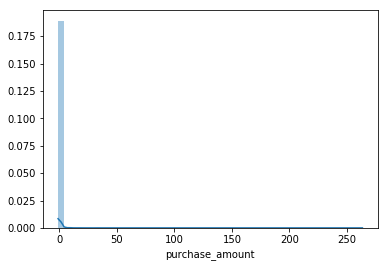

In [26]:
# Purchase amount distribution 
sns.distplot(n_txs.purchase_amount)

Stats
       purchase_amount
count     1.944694e+06
mean     -5.940558e-01
std       2.510533e-01
min      -7.468928e-01
25%      -7.168548e-01
50%      -6.763132e-01
75%      -5.876268e-01
max       1.530616e+00


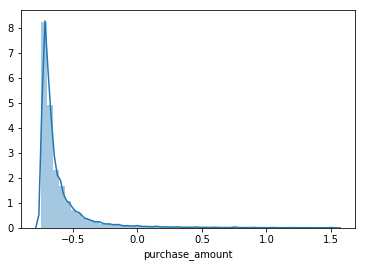

In [29]:
# Purchase amount distribution without outliers 
n_txs_no_outliers = filter_outliers(n_txs, ['purchase_amount'])
sns.distplot(n_txs_no_outliers.purchase_amount)

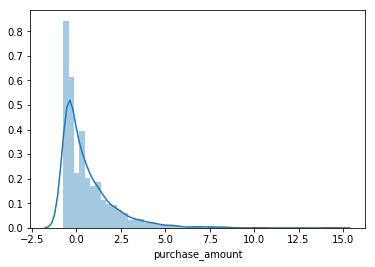

In [30]:
# purchase amount with premium merchants M_ID_96ba3c7b60
sns.distplot(n_txs[n_txs.merchant_id == 'M_ID_96ba3c7b60'].purchase_amount)

count    4015.000000
mean        4.333177
std         6.223856
min         1.531111
25%         2.013628
50%         2.829402
75%         4.512371
max       263.157498
Name: purchase_amount, dtype: float64


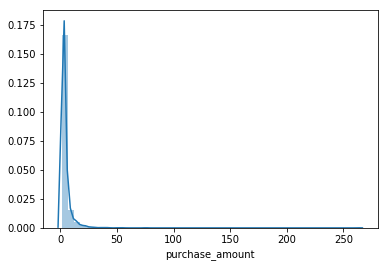

In [38]:
# Outliers with Cat1 = N, Cat2 = 1, Cat3 = C 
print(purchase_outliers[(purchase_outliers.category_1 == 'N') & (purchase_outliers.category_2 == 1) & (purchase_outliers.category_3=='C')].purchase_amount.describe())
sns.distplot(purchase_outliers[(purchase_outliers.category_1 == 'N') & (purchase_outliers.category_2 == 1) & (purchase_outliers.category_3=='C')].purchase_amount)

count    63447.000000
mean        -0.261016
std          0.437528
min         -0.731881
25%         -0.554441
50%         -0.418128
75%         -0.145847
max          1.530345
Name: purchase_amount, dtype: float64


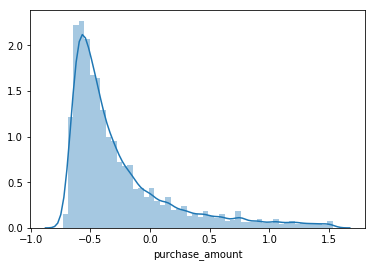

In [39]:
# No Outliers with Cat1 = N, Cat2 = 1, Cat3 = C 
print(n_txs_no_outliers[(n_txs_no_outliers.category_1 == 'N') & (n_txs_no_outliers.category_2 == 1) & (n_txs_no_outliers.category_3=='C')].purchase_amount.describe())
sns.distplot(n_txs_no_outliers[(n_txs_no_outliers.category_1 == 'N') & (n_txs_no_outliers.category_2 == 1) & (n_txs_no_outliers.category_3=='C')].purchase_amount)